Equipo 14

Integrantes:

García Hernández, Enrique Ricardo.A01315428

Hernández Camarillo, Francisco Javier. A00998083

Hernández Cerecedo, Erick de Jesus. A01066428

Hernández Navarro, José David. A01793021

Jimenez Chacón, Joan Sebastian. A01793970

2. Implementa un algoritmos de realce o mejoramiento de imágenes mediante un algoritmo de en el cual se extraen las líneas de la imagen y después se aplica la diferencia con la imagen original, multiplicando los píxeles de la imagen “máscara” (las líneas encontradas) por un factor alfa mayor a 1.

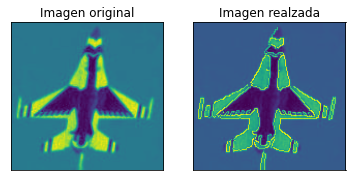

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def enhance_image(image, alpha=1.5):
    # Aplicar el filtro de detección de bordes de Canny
    edges = cv2.Canny(image, 100, 200)
    # Crear la máscara de bordes multiplicando los píxeles de la imagen de bordes por alpha
    mask = np.uint8(alpha * edges)
    # Aplicar la máscara a la imagen original
    enhanced_image = cv2.addWeighted(image, 1, mask, 1, 0)
    return enhanced_image

# Cargar la imagen original
image = cv2.imread('f16_template.jpg', 0)

# Realzar la imagen
enhanced_image = enhance_image(image)

# Mostrar la imagen original y la imagen realzada
plt.subplot(121), plt.imshow(image)
plt.title('Imagen original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(enhanced_image)
plt.title('Imagen realzada'), plt.xticks([]), plt.yticks([])
plt.show()

3. Buscar una aplicación médica (en el libro de Gonzalez viene varios ejemplos de imágenes PET) y hacer mejoramiento usando la técnica de de la Figura 3.43 combinando diferentes etapas de procesamiento de imagenes

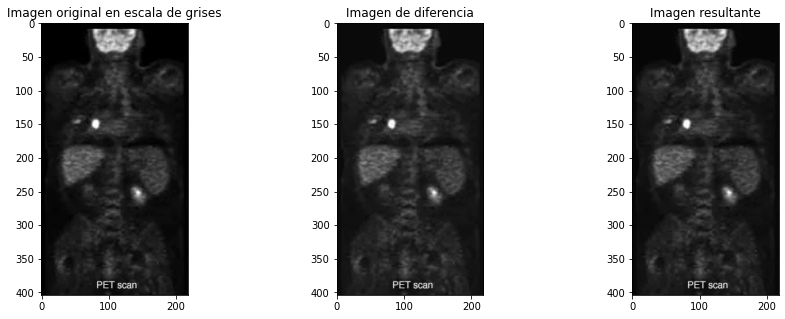

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

# Cargar imagen PET
im = plt.imread('pet scan.png')

# Convertir la imagen a escala de grises
im_gray = np.dot(im[..., :3], [0.2989, 0.5870, 0.1140])

# Aplicar filtro de bordes de Laplaciano para extraer líneas de la imagen
im_laplacian = ndimage.filters.laplace(im_gray)

# Aplicar filtro Gaussiano para suavizar la imagen
im_gaussian = ndimage.filters.gaussian_filter(im_laplacian, sigma=2)

# Calcular la diferencia entre la imagen original y la imagen suavizada
im_difference = im_gray - im_gaussian

# Multiplicar la imagen de diferencia por un factor alfa mayor a 1
alpha = 1.5
im_result = im_gray + alpha * im_difference

# Mostrar resultados
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(im_gray, cmap='gray')
plt.title('Imagen original en escala de grises')

plt.subplot(1, 3, 2)
plt.imshow(im_difference, cmap='gray')
plt.title('Imagen de diferencia')

plt.subplot(1, 3, 3)
plt.imshow(im_result, cmap='gray')
plt.title('Imagen resultante')

plt.show()

